# Vertigo - Mass on spring example

This is an example of analysis of a motion capture from a Vertigo2 unit which was attached to a spring oscillating at around 1Hz and with an amplitude of 5-10cm.

We will use the Vertigo motion capture file to show how we can find the oscillation frequency and amplitude.

In [17]:
from motion import MotionCapture
import matplotlib.pyplot as plt
from scipy import signal, integrate

Now we need to create the MotionCapture object by loading the log file.

In [18]:
filename = 'vtg_log_20200412121543.csv'
capture = MotionCapture(filename)
wf = capture.linear_accel_world

In [19]:
fs = 1.0 / ((wf.timestamp[1] - wf.timestamp[0]).total_seconds())
print(f"Identified sample frequency as {fs}Hz")

Identified sample frequency as 200.0Hz


We need to integrate twice to derive velocity from acceleration, and then displacement from velocity. We now design a digital filter to remove the DC component at each stage of the integration, and numerically integrate.

In [20]:
flt = signal.butter(N=2, Wn=0.25, btype='highpass', output='sos', fs=fs)
vz = integrate.cumtrapz(y=wf.az, dx=1/fs, initial=0)
vz = signal.sosfilt(flt, vz)
sz = integrate.cumtrapz(y=vz, dx=1/fs, initial=0)
sz = signal.sosfilt(flt, sz)

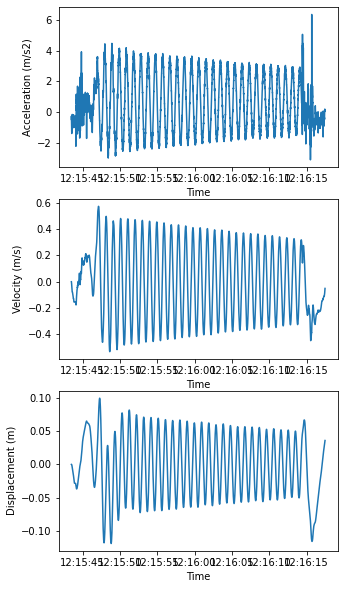

In [21]:
fig = plt.figure(figsize=(5,10))
plt.subplot(311)
plt.plot(wf.timestamp, wf.az)
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s2)')
plt.subplot(312)
plt.plot(wf.timestamp, vz)
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.subplot(313)
plt.plot(wf.timestamp, sz)
plt.xlabel('Time')
plt.ylabel('Displacement (m)')
plt.show()

We can see from the displacement plot that the mass is oscillating at around 1Hz and has an amplitude of around 0.075m, or 7.5cm.